In [15]:
# Step 1: Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report

Dataset: fashion_mnist
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


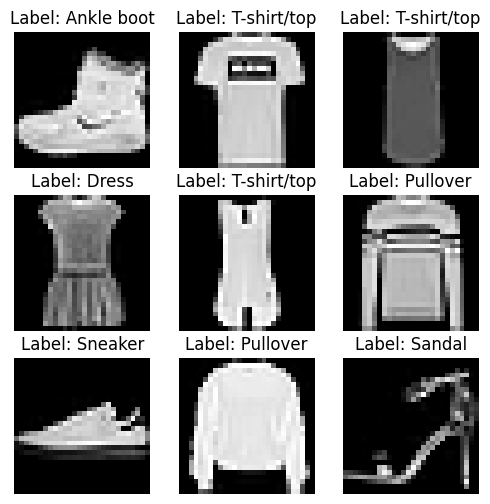

In [16]:
# Step 2: Load dataset (MNIST or Fashion-MNIST)

# Choose dataset: "mnist" or "fashion_mnist"
DATASET = "fashion_mnist"   # <-- change this line only!

if DATASET == "mnist":
    from tensorflow.keras.datasets import mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    class_names = [str(i) for i in range(10)]  # digits 0-9

elif DATASET == "fashion_mnist":
    from tensorflow.keras.datasets import fashion_mnist
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print("Dataset:", DATASET)
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

# Visualize some samples
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {class_names[y_train[i]]}")
    plt.axis("off")
plt.show()


In [17]:
# Step 3: Preprocess
# Normalize pixel values [0-255] -> [0-1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape (28,28) -> (28,28,1) for Conv2D
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("x_train shape:", x_train.shape)
print("y_train_cat shape:", y_train_cat.shape)

x_train shape: (60000, 28, 28, 1)
y_train_cat shape: (60000, 10)


In [18]:
# Step 4: Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

model.summary()

c:\Users\enisw\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Step 5: Compile model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [20]:
# Step 6: Train model with EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_cnn.h5", save_best_only=True, monitor="val_loss")

history = model.fit(
    x_train, y_train_cat,
    validation_split=0.2,
    epochs=15,
    batch_size=128,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/15
357/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6301 - loss: 1.0431

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6353 - loss: 1.0276 - val_accuracy: 0.8367 - val_loss: 0.4505
Epoch 2/15
368/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8276 - loss: 0.4833

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8277 - loss: 0.4829 - val_accuracy: 0.8662 - val_loss: 0.3643
Epoch 3/15
370/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8506 - loss: 0.4131

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8506 - loss: 0.4130 - val_accuracy: 0.8776 - val_loss: 0.3390
Epoch 4/15
361/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8645 - loss: 0.3796

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8646 - loss: 0.3793 - val_accuracy: 0.8854 - val_loss: 0.3140
Epoch 5/15
361/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8725 - loss: 0.3487

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8727 - loss: 0.3485 - val_accuracy: 0.8863 - val_loss: 0.3090
Epoch 6/15
364/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8819 - loss: 0.3296

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8819 - loss: 0.3295 - val_accuracy: 0.8954 - val_loss: 0.2836
Epoch 7/15
366/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8888 - loss: 0.3067

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8888 - loss: 0.3066 - val_accuracy: 0.8980 - val_loss: 0.2791
Epoch 8/15
363/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8914 - loss: 0.3019

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8915 - loss: 0.3017 - val_accuracy: 0.9028 - val_loss: 0.2637
Epoch 9/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9014 - loss: 0.2756 - val_accuracy: 0.9026 - val_loss: 0.2685
Epoch 10/15
371/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9027 - loss: 0.2683

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9027 - loss: 0.2683 - val_accuracy: 0.9087 - val_loss: 0.2531
Epoch 11/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9065 - loss: 0.2569 - val_accuracy: 0.9047 - val_loss: 0.2625
Epoch 12/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9105 - loss: 0.2462 - val_accuracy: 0.9101 - val_loss: 0.2535
Epoch 13/15
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9109 - loss: 0.2418

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9109 - loss: 0.2417 - val_accuracy: 0.9106 - val_loss: 0.2477
Epoch 14/15
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9160 - loss: 0.2294

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9160 - loss: 0.2294 - val_accuracy: 0.9141 - val_loss: 0.2408
Epoch 15/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9213 - loss: 0.2147 - val_accuracy: 0.9137 - val_loss: 0.2416


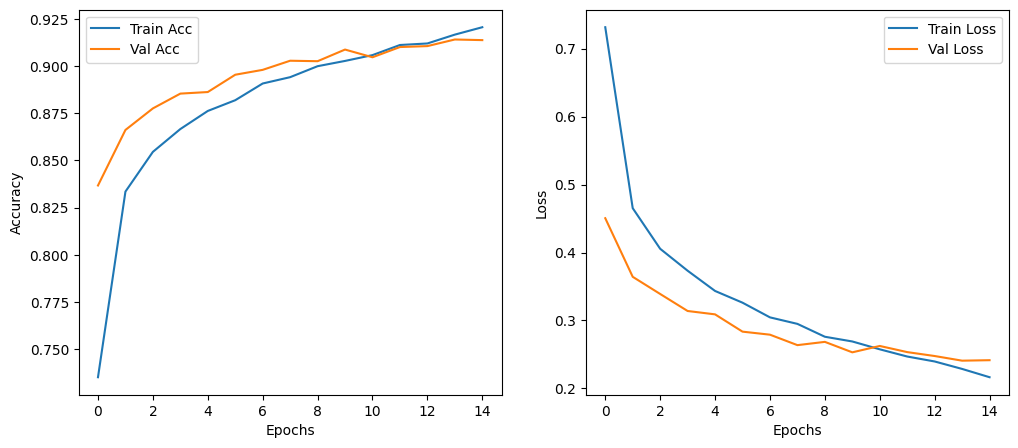

In [21]:
# Step 7: Training curves
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
# Step 8: Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9057, Test Loss: 0.2623


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step


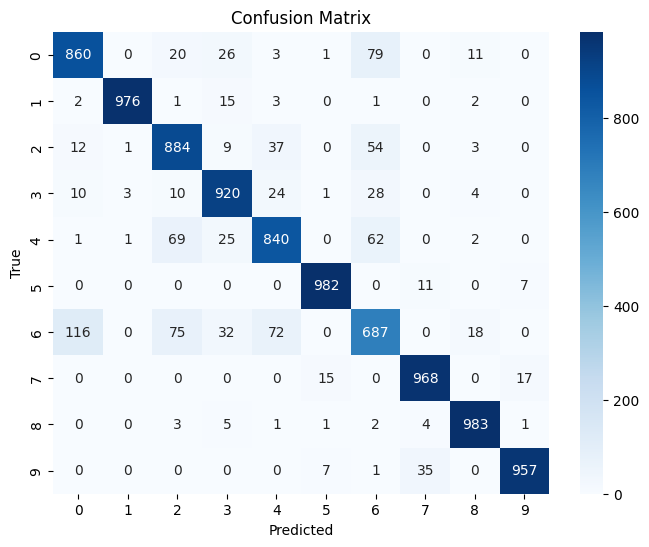

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.88      0.86      1000
           3       0.89      0.92      0.91      1000
           4       0.86      0.84      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.69      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.90      0.91      0.90     10000
weighted avg       0.90      0.91      0.90     10000



In [23]:
# Step 9: Confusion Matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

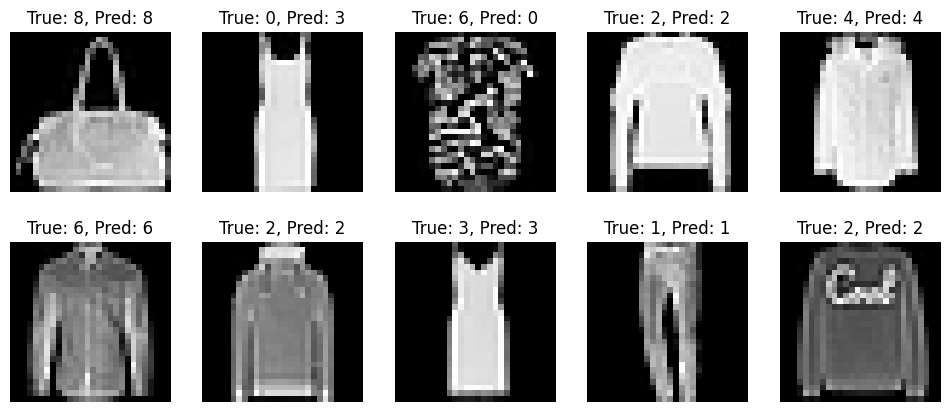

In [24]:
# Step 10: Visualize some predictions
plt.figure(figsize=(12,5))
for i in range(10):
    idx = np.random.randint(0, len(x_test))
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap="gray")
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis("off")
plt.show()